<a href="https://colab.research.google.com/github/nightitachi/Block-Notes/blob/main/breast_cancer_ipynbb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import RandomOverSampler

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('Breast_Cancer.csv')

# Exploring Data

In [ ]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [ ]:
data.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive
4023,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,Alive


In [ ]:
data.sample()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
3465,68,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,15,Positive,Negative,5,3,81,Alive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [ ]:
data.isnull().sum()

,0
Age,0
Race,0
Marital Status,0
T Stage,0
N Stage,0
6th Stage,0
differentiate,0
Grade,0
A Stage,0
Tumor Size,0


In [ ]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [ ]:
data.shape

(4024, 16)

In [ ]:
data["Estrogen Status"]

,Estrogen Status
0,Positive
1,Positive
2,Positive
3,Positive
4,Positive
...,...
4019,Positive
4020,Positive
4021,Positive
4022,Positive


In [ ]:
data.RNE=data.rename(columns={"Reginol Node Examined": "RNE"}, inplace=True)


In [ ]:
data.RNP=data.rename(columns={"Regional Node Positive": "RNP"}, inplace=True)
data

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [ ]:
print(data.columns.tolist())


['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Status']


# Cleaning Data

In [ ]:
data


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [ ]:
data.drop(['differentiate', 'Race','6th Stage'], axis=1 , inplace = True )
data

,Age,Marital Status,T Stage,N Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,Married,T1,N1,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,Married,T2,N2,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,Divorced,T3,N3,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,Married,T1,N1,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,Married,T2,N1,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Married,T1,N1,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,Divorced,T2,N2,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,Married,T2,N1,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Divorced,T2,N1,2,Regional,44,Positive,Positive,11,1,72,Alive


([<matplotlib.patches.Wedge at 0x783a69e250f0>,
 [Text(-1.0638837472159541, 0.5551138373430623, 'Alive'),
  Text(0.9752267206389041, -0.5088544422051251, 'Dead')],
 [Text(-0.6205988525426399, 0.3238164051167863, '84.7%'),
  Text(0.5319418476212203, -0.27755696847552275, '15.3%')])

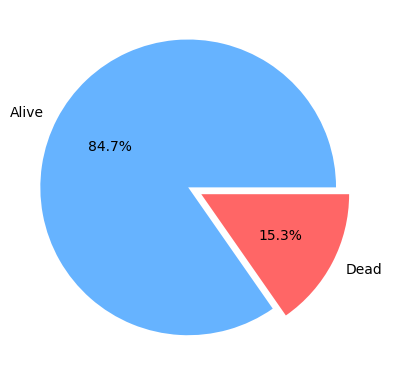

In [ ]:
alive_counts = data['Status'].value_counts()
colors=['#66b3ff', '#ff6666']
plt.pie(alive_counts , labels=["Alive" , "Dead"]  , colors = colors , explode=(0.1,0), autopct='%1.1f%%')

Text(0.5, 0, 'Status')

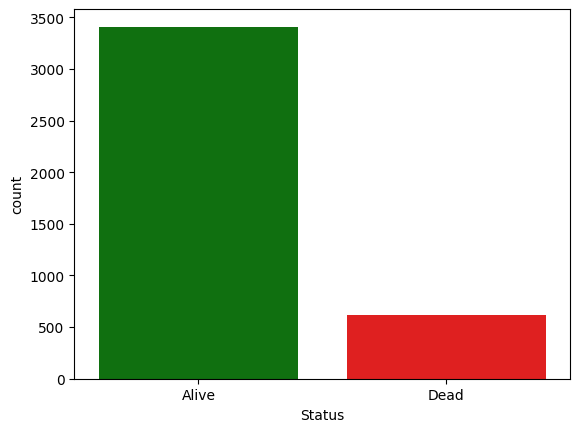

In [ ]:
sns.countplot(x="Status" , data = data , palette = (['g' ,'r']) )
plt.xlabel("Status")


# Transforming Data

In [ ]:
data.dtypes

,0
Age,int64
Marital Status,object
T Stage,object
N Stage,object
Grade,object
A Stage,object
Tumor Size,int64
Estrogen Status,object
Progesterone Status,object
Regional Node Examined,int64


In [ ]:
la= LabelEncoder()

In [ ]:
obj = data.select_dtypes(include=('object'))
non_obj = data.select_dtypes(exclude=('object'))

In [ ]:
for i in range(obj.shape[1]):
    col_name = obj.columns[i]
    obj[col_name] = la.fit_transform(obj[col_name])

In [ ]:
obj

,Marital Status,T Stage,N Stage,Grade,A Stage,Estrogen Status,Progesterone Status,Status
0,1,0,0,3,1,1,1,0
1,1,1,1,2,1,1,1,0
2,0,2,2,2,1,1,1,0
3,1,0,0,3,1,1,1,0
4,1,1,0,3,1,1,1,0
...,...,...,...,...,...,...,...,...
4019,1,0,0,2,1,1,1,0
4020,0,1,1,2,1,1,1,0
4021,1,1,0,2,1,1,0,0
4022,0,1,0,2,1,1,1,0


In [ ]:
obj = obj.astype('int')

In [ ]:
data = pd.concat([obj, non_obj], axis=1)


In [ ]:
data

,Marital Status,T Stage,N Stage,Grade,A Stage,Estrogen Status,Progesterone Status,Status,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,1,0,0,3,1,1,1,0,68,4,24,1,60
1,1,1,1,2,1,1,1,0,50,35,14,5,62
2,0,2,2,2,1,1,1,0,58,63,14,7,75
3,1,0,0,3,1,1,1,0,58,18,2,1,84
4,1,1,0,3,1,1,1,0,47,41,3,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,1,0,0,2,1,1,1,0,62,9,1,1,49
4020,0,1,1,2,1,1,1,0,56,46,14,8,69
4021,1,1,0,2,1,1,0,0,68,22,11,3,69
4022,0,1,0,2,1,1,1,0,58,44,11,1,72


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Marital Status          4024 non-null   int64
 1   T Stage                 4024 non-null   int64
 2   N Stage                 4024 non-null   int64
 3   Grade                   4024 non-null   int64
 4   A Stage                 4024 non-null   int64
 5   Estrogen Status         4024 non-null   int64
 6   Progesterone Status     4024 non-null   int64
 7   Status                  4024 non-null   int64
 8   Age                     4024 non-null   int64
 9   Tumor Size              4024 non-null   int64
 10  Regional Node Examined  4024 non-null   int64
 11  Reginol Node Positive   4024 non-null   int64
 12  Survival Months         4024 non-null   int64
dtypes: int64(13)
memory usage: 408.8 KB


# Models

In [ ]:
x=data.drop('Status' , axis=1)
y=data.Status


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size=.2 , random_state=21)

In [ ]:
model1= LogisticRegression()

In [ ]:
model1.fit(x_train , y_train)

LogisticRegression()

In [ ]:
pre= model1.predict(x_test)
pre

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
print(classification_report(pre , y_test))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       745
           1       0.75      0.78      0.76       619

    accuracy                           0.78      1364
   macro avg       0.78      0.78      0.78      1364
weighted avg       0.78      0.78      0.78      1364



In [ ]:
rs = RandomOverSampler(random_state=14)
x_res,y_res=rs.fit_resample(x,y)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res ,test_size=.2 , random_state=21)

In [ ]:
def modeling(model_name , model):
  print(f"Evaluating_model : {model_name}")
  model.fit(x_train , y_train)
  pre = model.predict(x_test)
  print(classification_report(pre , y_test))

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "Support Vector Machine": SVC()
}

for model_name, model in models.items():
    modeling(model_name, model)


Evaluating_model : Logistic Regression
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       745
           1       0.75      0.78      0.76       619

    accuracy                           0.78      1364
   macro avg       0.78      0.78      0.78      1364
weighted avg       0.78      0.78      0.78      1364

Evaluating_model : Random Forest
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       681
           1       1.00      0.95      0.98       683

    accuracy                           0.98      1364
   macro avg       0.98      0.98      0.98      1364
weighted avg       0.98      0.98      0.98      1364

Evaluating_model : Gradient Boosting
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       789
           1       0.73      0.83      0.78       575

    accuracy                           0.80      1364
   macro avg       

# choosing the RandomForestClassifier as a tester

In [ ]:
modelx = RandomForestClassifier()
modelx.fit(x,y)

RandomForestClassifier()

In [ ]:
pre = modelx.predict(x_test)
pre

array([1, 0, 1, ..., 0, 0, 0])